# Projeto Prático 2

## Redes Neurais - 2020

<img src="https://www.researchgate.net/profile/Germano_Rosa/publication/262747683/figure/fig1/AS:392393250623493@1470565249417/Figura-1-Modelo-de-um-neuronio-perceptron-de-Rosenblatt-Fonte-Adaptado-de-Medeiros.png" width=600px height=200px />

### Elaborado por: 

* Carlos Diego Ferreira
* João Victor de Oliveira
* Luiz Carlos Silva
* Mikael Fonseca

# Descrição Geral do projeto

Está dividido em 3 grandes partes, sendo elas
1. Implementação e treino de um neurônio apenas
2. Testes com diferentes configurações de hiper parâmetros
3. Treino em holdout + medição de desempenho

Este notebook é referente à parte 3

# Sumário:

**1. [Parte 3: Validação Holdout em Problema Não-Linearmente Separável](#id1)** <br>
**2. [Carregar Dataset](#id2)** <br>
**3. [Visualização dos Dados](#id3)** <br>
**4. [Holdout](#id4)** <br>


<a id="id1"></a> <br> 
## **Parte 3: Validação Holdout em Problema Não-Linearmente Separável:** 

Treinamento para um problema não linearmente separável, incluindo visualizações que demonstrem a natureza do dataset, o processo de treinamento e os resultados de predição obtidos pelo neurônio.

<a id="id2"></a> <br> 
## **Carregar Dataset:** 

In [18]:
#imports
import numpy as np
import random
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d

#import perceptron class
from perceptron import Perceptron

In [2]:
# dt = np.dtype([('x1', np.float64), ('x2', np.float64), ('yd', np.float64)])
data = np.fromfile('../data/dataHoldout.txt')

In [3]:
data = data.reshape(data.shape[0]//3, 3)

In [4]:
X = data[:,:-1]
Y = data[:,-1]
print(X.shape, Y.shape)

(800, 2) (800,)


<a id="id3"></a> <br> 
# Visualização dos Dados 

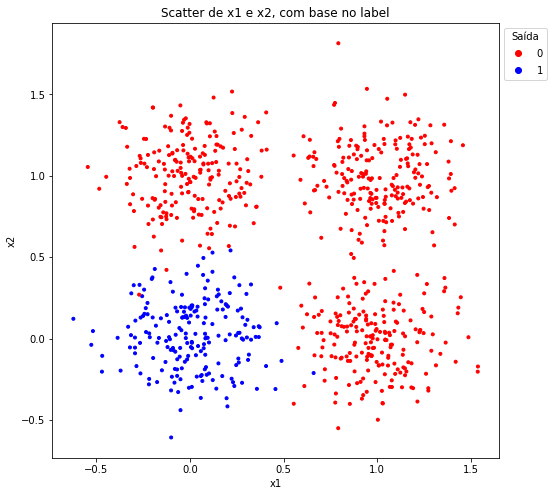

In [5]:
X1 = X[:,0]
X2 = X[:,1]

# def get_line_y(x, c0, c1):
#     return c0 + c1 * x

# c0 = p.weights[0]/p.weights[2]
# c1 = -p.weights[1]/p.weights[2]

# lineX = np.array([X1.min(), X1.max()])
# lineY = np.array([get_line_y(X1.min(), c0, c1), get_line_y(X1.max(), c0, c1)])

binary_cmap = ListedColormap(['red', 'blue'])

fig, ax = plt.subplots(figsize=(8,8))
ax.set(xlabel='x1', ylabel='x2',
       title='Scatter de x1 e x2, com base no label')

scatter = ax.scatter(X1, X2, c=Y, marker=".", cmap=binary_cmap)
# ax.plot(lineX, lineY, color="black", alpha= 0.5)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Saída", bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))


<a id="id4"></a> <br> 
# Holdout

In [6]:
#deve-se implementar uma função que divida os dados em conjunto de treino e de teste.
def holdout_split(X, Y, train_split = 0.7, random_state = 56, shuffle = False):
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    X = X[s]
    Y = Y[s]
    
    state = np.random.RandomState(random_state)
    arr_rand = state.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, train_split*100)
    x_train = X[split]
    y_train = Y[split]
    x_test =  X[~split]
    y_test = Y[~split]
    return x_train, x_test, y_train, y_test

In [7]:
# X, Y = shuffle(X, Y)
x_train, x_test, y_train, y_test = holdout_split(X, Y, shuffle = True)
print(x_train.shape, x_test.shape)

(560, 2) (240, 2)


<a id="id5"></a> <br> 
# Treinamento

In [8]:
model = Perceptron()
model.fit(x_train, y_train, num_epochs = 100, shuffle = True, learning_rate=0.01, sampling_range = 1)

Pesos iniciais: [ 0.12125382 -0.34793786  0.25684715]
------ Época 1 ------
Novos pesos: [ 0.13125382 -0.34601607  0.24644217]
Novos pesos: [ 0.12125382 -0.3459629   0.24591547]
Novos pesos: [ 0.11125382 -0.34795379  0.24720811]
Novos pesos: [ 0.10125382 -0.3471296   0.24721877]
Novos pesos: [ 0.09125382 -0.34500306  0.25000868]
Novos pesos: [ 0.10125382 -0.33954688  0.23947601]
Novos pesos: [ 0.09125382 -0.33976975  0.23978474]
Novos pesos: [ 0.08125382 -0.3419454   0.23730494]
Novos pesos: [ 0.07125382 -0.34136391  0.23500004]
Novos pesos: [ 0.08125382 -0.34094638  0.22898628]
Novos pesos: [ 0.09125382 -0.34163156  0.21761455]
Novos pesos: [ 0.10125382 -0.34217974  0.2074301 ]
Novos pesos: [ 0.09125382 -0.3422272   0.20841278]
Novos pesos: [ 0.08125382 -0.34269888  0.21034917]
Novos pesos: [ 0.07125382 -0.34338247  0.20805642]
Novos pesos: [ 0.08125382 -0.34211292  0.20055819]
Novos pesos: [ 0.07125382 -0.34153043  0.19978214]
Novos pesos: [ 0.08125382 -0.34027727  0.19209354]
Novos 

Total de ajustes: 32
------ Época 27 ------
Novos pesos: [-0.02874618 -0.03738985 -0.04327903]
Novos pesos: [-0.01874618 -0.03439856 -0.05110577]
Novos pesos: [-0.02874618 -0.0336805  -0.04615893]
Novos pesos: [-0.01874618 -0.03096651 -0.04885369]
Novos pesos: [-0.02874618 -0.02770581 -0.04553406]
Novos pesos: [-0.01874618 -0.03795922 -0.04467172]
Novos pesos: [-0.00874618 -0.04575161 -0.04129793]
Novos pesos: [-0.01874618 -0.04534459 -0.03934315]
Novos pesos: [-0.00874618 -0.05326109 -0.03383788]
Novos pesos: [-0.01874618 -0.0504228  -0.0339068 ]
Novos pesos: [-0.02874618 -0.04674737 -0.03381597]
Novos pesos: [-0.01874618 -0.04543353 -0.04220702]
Novos pesos: [-0.00874618 -0.04247551 -0.0478336 ]
Novos pesos: [-0.01874618 -0.04167663 -0.04572347]
Novos pesos: [-0.00874618 -0.04042431 -0.04993928]
Novos pesos: [-0.01874618 -0.03922227 -0.0458403 ]
Novos pesos: [-0.02874618 -0.03801699 -0.04056415]
Novos pesos: [-0.01874618 -0.04657466 -0.03918889]
Novos pesos: [-0.02874618 -0.04385084 

Novos pesos: [-0.01874618 -0.04152582 -0.05344073]
Novos pesos: [-0.00874618 -0.04928365 -0.04950863]
Novos pesos: [-0.01874618 -0.04602145 -0.04957934]
Novos pesos: [-0.02874618 -0.04234846 -0.04882785]
Novos pesos: [-0.01874618 -0.039153   -0.05707253]
Novos pesos: [-0.02874618 -0.03613711 -0.0543336 ]
Novos pesos: [-0.01874618 -0.04531792 -0.05063984]
Novos pesos: [-0.02874618 -0.0445082  -0.04755439]
Novos pesos: [-0.01874618 -0.04252902 -0.05486217]
Novos pesos: [-0.00874618 -0.0412767  -0.05907797]
Novos pesos: [-0.01874618 -0.03915334 -0.05882623]
Novos pesos: [-0.00874618 -0.04635684 -0.05693844]
Novos pesos: [-0.01874618 -0.04835779 -0.05318728]
Novos pesos: [-0.02874618 -0.04763973 -0.04824044]
Novos pesos: [-0.01874618 -0.04464844 -0.05606719]
Novos pesos: [-0.00874618 -0.05468043 -0.05108118]
Novos pesos: [-0.01874618 -0.05393909 -0.05013759]
Novos pesos: [-0.02874618 -0.05298814 -0.04658255]
Novos pesos: [-0.01874618 -0.06090463 -0.04107727]
Novos pesos: [-0.02874618 -0.05

Novos pesos: [-0.00874618 -0.0435072  -0.0514265 ]
Novos pesos: [-0.01874618 -0.04175344 -0.04964385]
Novos pesos: [-0.02874618 -0.03873755 -0.04690492]
Novos pesos: [-0.01874618 -0.04581047 -0.04635639]
Novos pesos: [-0.02874618 -0.04460519 -0.04108025]
Novos pesos: [-0.01874618 -0.05239758 -0.03770645]
Novos pesos: [-0.02874618 -0.05002977 -0.03395329]
Novos pesos: [-0.01874618 -0.04731579 -0.03664804]
Total de ajustes: 32
------ Época 75 ------
Novos pesos: [-0.02874618 -0.04405509 -0.03332841]
Novos pesos: [-0.01874618 -0.03859891 -0.04386108]
Novos pesos: [-0.00874618 -0.0463913  -0.04048729]
Novos pesos: [-0.01874618 -0.04436126 -0.03852775]
Novos pesos: [-0.02874618 -0.04223472 -0.03573784]
Novos pesos: [-0.01874618 -0.03952074 -0.03843259]
Novos pesos: [-0.00874618 -0.04727857 -0.03450049]
Novos pesos: [-0.01874618 -0.04491077 -0.03074733]
Novos pesos: [-0.00874618 -0.05045261 -0.02674399]
Novos pesos: [-0.01874618 -0.04638798 -0.02843451]
Novos pesos: [-0.00874618 -0.04597044 

Novos pesos: [-0.02874618 -0.05083586 -0.05562624]
Novos pesos: [-0.01874618 -0.04890662 -0.06188444]
Novos pesos: [-0.02874618 -0.04589074 -0.05914551]
Novos pesos: [-0.01874618 -0.05364857 -0.05521341]
Novos pesos: [-0.02874618 -0.05244653 -0.05111443]
Novos pesos: [-0.03874618 -0.05124125 -0.04583829]
Novos pesos: [-0.02874618 -0.06003143 -0.04381928]
Novos pesos: [-0.01874618 -0.05707341 -0.04944586]
Novos pesos: [-0.02874618 -0.05381271 -0.04612623]
Novos pesos: [-0.01874618 -0.05061443 -0.0559856 ]
Novos pesos: [-0.02874618 -0.04989636 -0.05103877]
Novos pesos: [-0.01874618 -0.05843286 -0.04702765]
Novos pesos: [-0.02874618 -0.05475987 -0.04627616]
Novos pesos: [-0.01874618 -0.05176858 -0.0541029 ]
Novos pesos: [-0.02874618 -0.04960106 -0.04869313]
Total de ajustes: 40
------ Época 97 ------
Novos pesos: [-0.01874618 -0.05739345 -0.04531934]
Novos pesos: [-0.00874618 -0.06293529 -0.04131601]
Novos pesos: [-0.01874618 -0.06103239 -0.04141928]
Novos pesos: [-0.02874618 -0.0580165  

<a id="id6"></a> <br> 
# Métricas

In [9]:
def confusion_matrix(true, pred):
    cm = np.zeros((2,2))
    for p, t in zip(pred, true):
        cm[int(p)][int(t)] += 1
    return cm

def precision(cm):
    return cm[1][1]/(cm[1][1]+cm[0][1])

def recall(cm):
    return cm[1][1]/(cm[1][1]+cm[1][0])

def f1(precision, recall):
    return 2*precision*recall/(precision+recall)

def accuracy(cm):
    return (cm[1][1] + cm[0][0])/(np.sum(cm))

def metrics_report(y_pred, y_true):
    
    cm = confusion_matrix(y_true, y_pred)
    prec = precision(cm)
    rec = recall(cm)
    print('Matriz de Confusão')
    print(cm)
    print('---------------------------------')
    print('Acurácia: {}'.format(accuracy(cm)))
    print('Precisão: {}'.format(prec))
    print('Recall: {}'.format(rec))
    print('F1-Score: {}'.format(f1(prec, rec)))


In [10]:
y_pred = model.predict(x_test)

<a id="id7"></a> <br>
### Resultados Obtidos

In [11]:
# para conjunto de testes
metrics_report(y_test, y_pred)

Matriz de Confusão
[[182.   1.]
 [  3.  54.]]
---------------------------------
Acurácia: 0.9833333333333333
Precisão: 0.9818181818181818
Recall: 0.9473684210526315
F1-Score: 0.9642857142857142


In [12]:
y_pred_train = model.predict(x_train)

In [13]:
#para conjunto de treino
metrics_report(y_train, y_pred_train)

Matriz de Confusão
[[406.  11.]
 [ 10. 133.]]
---------------------------------
Acurácia: 0.9625
Precisão: 0.9236111111111112
Recall: 0.9300699300699301
F1-Score: 0.926829268292683


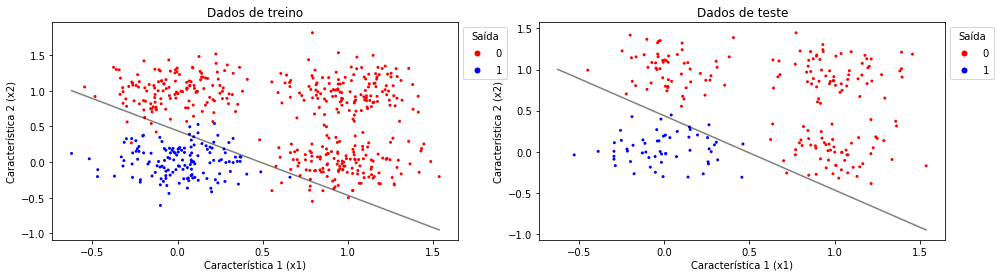

In [39]:
X1 = x_train[:,0]
X2 = x_train[:,1]

def get_line_y(x, c0, c1):
    return c0 + c1 * x

c0 = model.weights[0]/model.weights[2]
c1 = -model.weights[1]/model.weights[2]

lineX = np.array([X1.min(), X1.max()])
lineY = np.array([get_line_y(X1.min(), c0, c1), get_line_y(X1.max(), c0, c1)])

binary_cmap = ListedColormap(['red', 'blue'])

fig, ax = plt.subplots(1, 2, figsize=(16,4))
ax[0].set(xlabel='Característica 1 (x1)', ylabel='Característica 2 (x2)',
       title='Dados de treino')

scatter = ax[0].scatter(X1, X2, c=y_train, marker=".", cmap=binary_cmap, linewidth=0)
ax[0].plot(lineX, lineY, color="black", alpha= 0.5)

legend1 = ax[0].legend(*scatter.legend_elements(),
                    loc="upper left", title="Saída", bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
X1 = x_test[:,0]
X2 = x_test[:,1]

ax[1].set(xlabel='Característica 1 (x1)', ylabel='Característica 2 (x2)',
       title='Dados de teste')

scatter = ax[1].scatter(X1, X2, c=y_test, marker=".", cmap=binary_cmap, linewidth=0)
ax[1].plot(lineX, lineY, color="black", alpha= 0.5)

legend1 = ax[1].legend(*scatter.legend_elements(),
                    loc="upper left", title="Saída", bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
